# Pruebas
---
reproducción mínimalista (no entrenamiento, solo carga)

Model loaded from modelParams


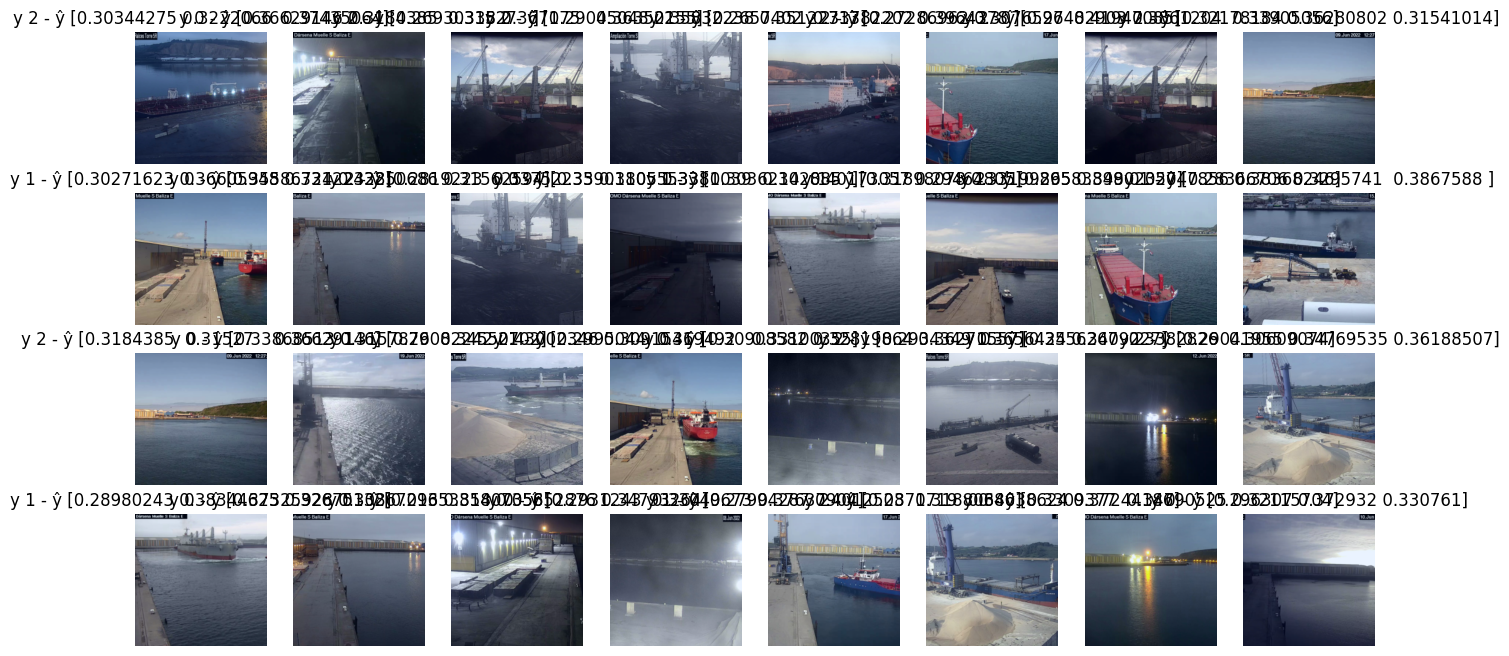

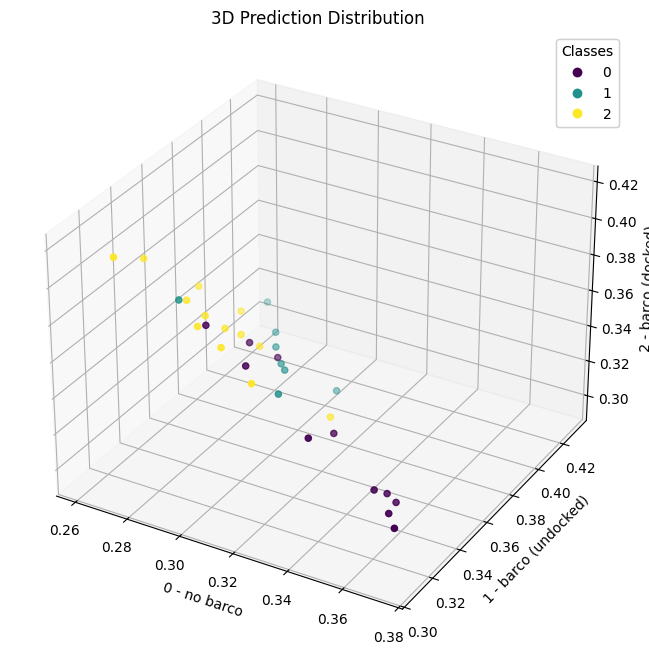

In [1]:
from torch.utils.data import DataLoader
from ship_classifier import ShipClassifier
from ship_dataset import ShipDataset

docked=True
pretrained=False

classifier = ShipClassifier(pretrained=pretrained,
                            docked=docked)
classifier.load_model('modelParams')
classifier.model.to('mps')

testset = ShipDataset(root_dir='/Users/pepe/carrera/3/2/vca/practicas/p2', 
                      train=False, 
                      dataAugmentation=False, 
                      docked=docked,
                      train_ratio=0.8)

classifier.plotgrid(testset)

Inferencia de una imagen

2


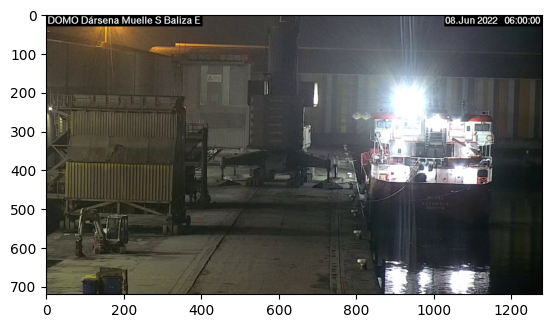

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import softmax

im = plt.imread('imagen.jpg')
plt.imshow(im)

classifier.model.to('mps')

im = torch.permute(torch.tensor(np.expand_dims(im,0),dtype=torch.float32),(0,3,1,2)).to('mps')

print(np.argmax(classifier.model(im)[0].cpu().detach().numpy()))

Visualización del aumento de datos

In [ ]:
from ship_dataset import ShipDataset

dataAugmentation = True
docked=True
pretrained=False

trainset = ShipDataset(root_dir='/Users/pepe/carrera/3/2/vca/practicas/p2', 
                       train=True, 
                       dataAugmentation=dataAugmentation, 
                       docked=docked)

trainset.plot_grid()
